# Cardiac Disease Prediction using Artificial Intelligence

# Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
Data = pd.read_csv("dataset.csv")
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Preprocessing

In [3]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
Data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
Data.shape

(303, 14)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
Data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Visualization

<AxesSubplot:ylabel='None'>

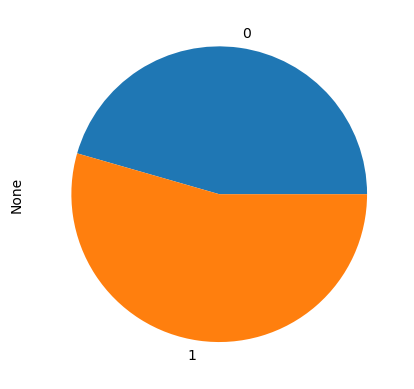

In [9]:
Data.groupby('target').size().plot(kind='pie')

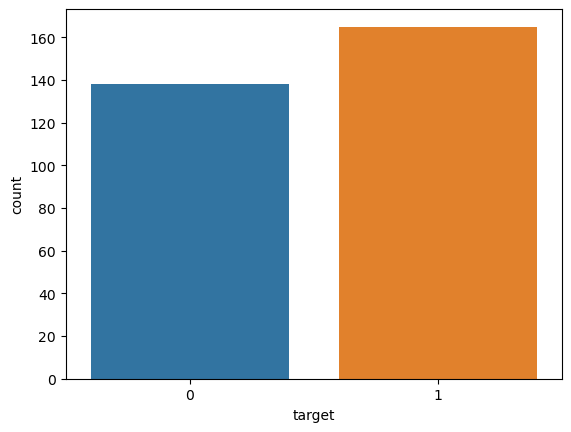

In [10]:
# count plot on single categorical variable
sns.countplot(x ='target', data = Data)
 
# Show the plot
plt.show()

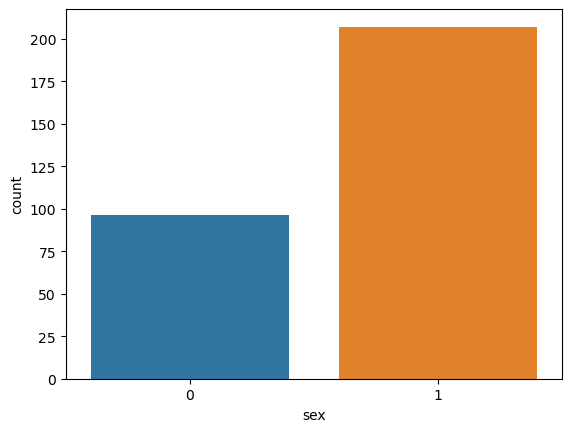

In [11]:
# count plot on single categorical variable
sns.countplot(x ='sex', data = Data)
 
# Show the plot
plt.show()

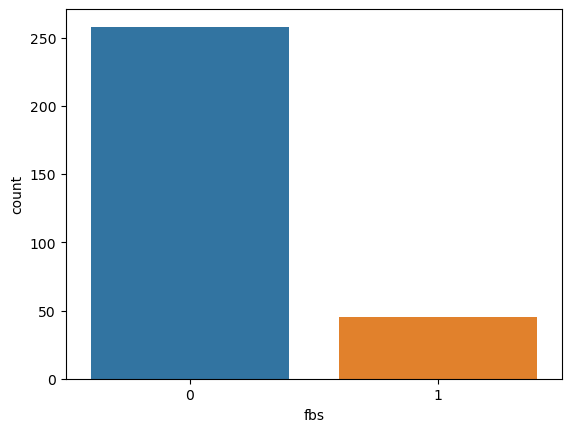

In [12]:
# count plot on single categorical variable
sns.countplot(x ='fbs', data = Data)
 
# Show the plot
plt.show()

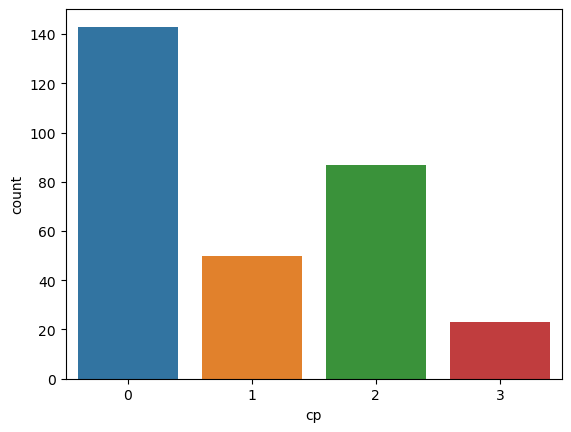

In [13]:
# count plot on single categorical variable
sns.countplot(x ='cp', data = Data)
 
# Show the plot
plt.show()

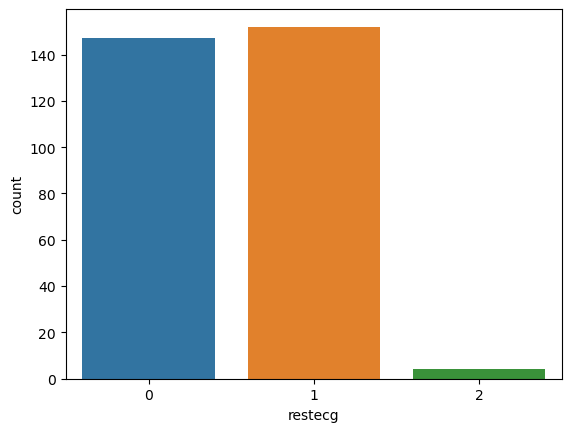

In [14]:
# count plot on single categorical variable
sns.countplot(x ='restecg', data = Data)
 
# Show the plot
plt.show()

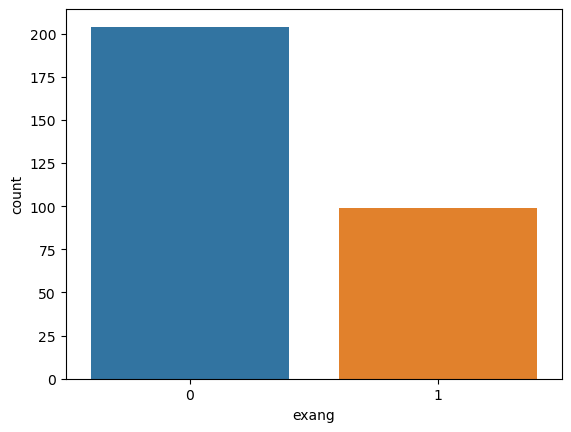

In [15]:
# count plot on single categorical variable
sns.countplot(x ='exang', data = Data)
 
# Show the plot
plt.show()

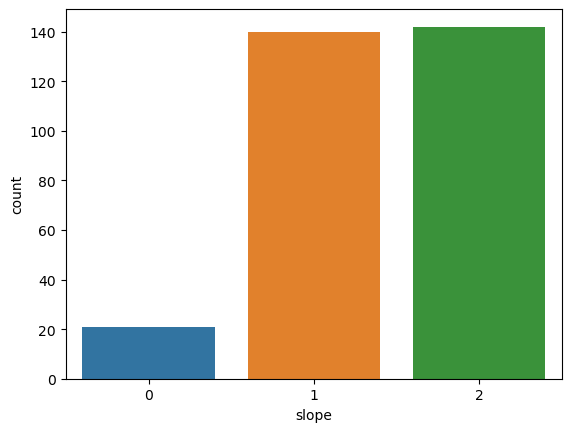

In [16]:
# count plot on single categorical variable
sns.countplot(x ='slope', data = Data)
 
# Show the plot
plt.show()

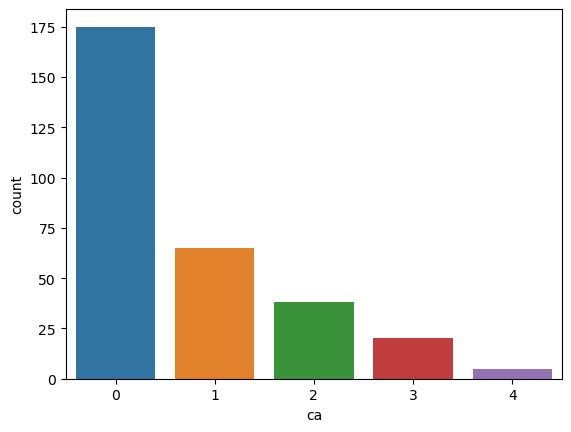

In [17]:
# count plot on single categorical variable
sns.countplot(x ='ca', data = Data)
 
# Show the plot
plt.show()

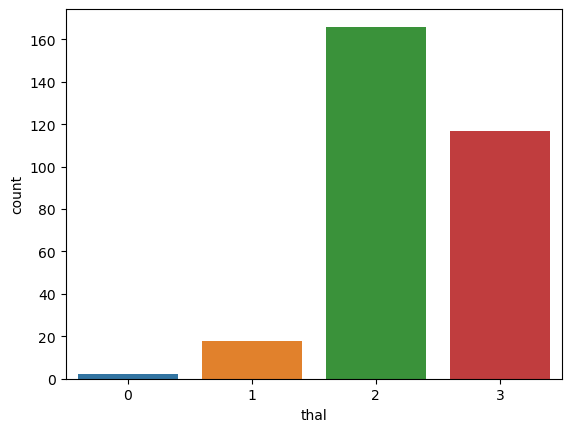

In [18]:
# count plot on single categorical variable
sns.countplot(x ='thal', data = Data)
 
# Show the plot
plt.show()

C:\Users\DLK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

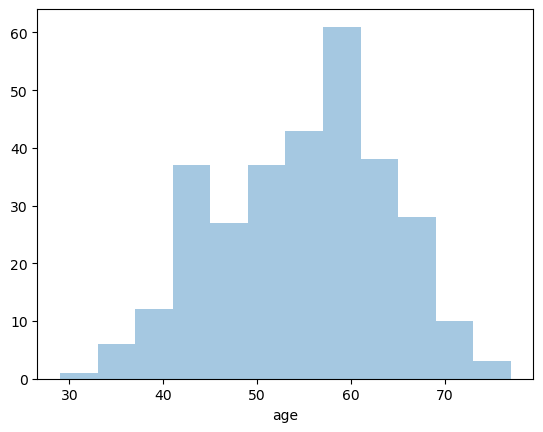

In [19]:
sns.distplot(a=Data['age'], kde=False)

<AxesSubplot:xlabel='trestbps'>

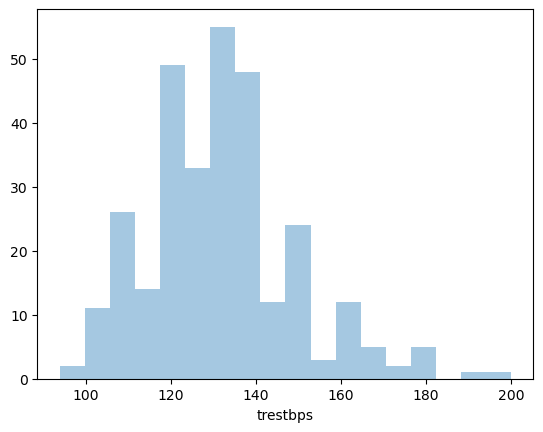

In [20]:
sns.distplot(a=Data['trestbps'], kde=False)

<AxesSubplot:xlabel='chol'>

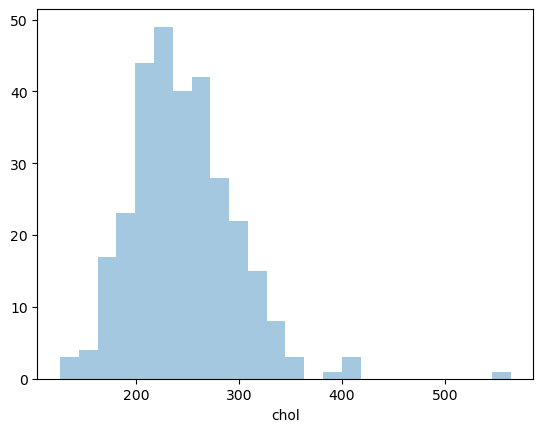

In [21]:
sns.distplot(a=Data['chol'], kde=False)

<AxesSubplot:xlabel='thalach'>

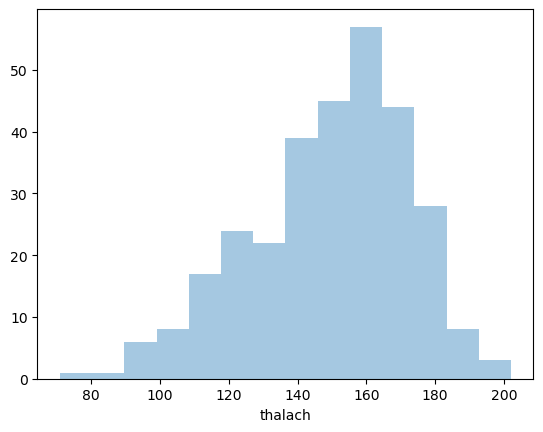

In [22]:
sns.distplot(a=Data['thalach'], kde=False)

<AxesSubplot:xlabel='oldpeak'>

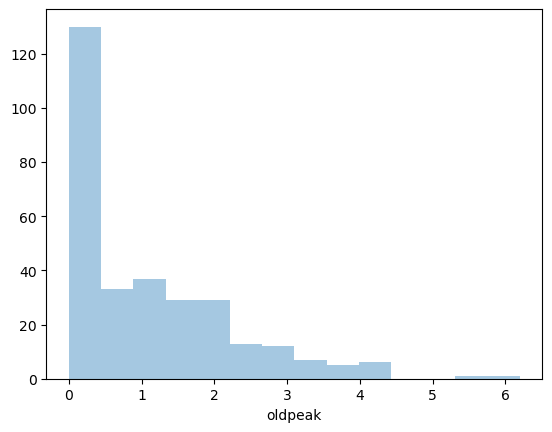

In [23]:
sns.distplot(a=Data['oldpeak'], kde=False)

<AxesSubplot:xlabel='age', ylabel='Density'>

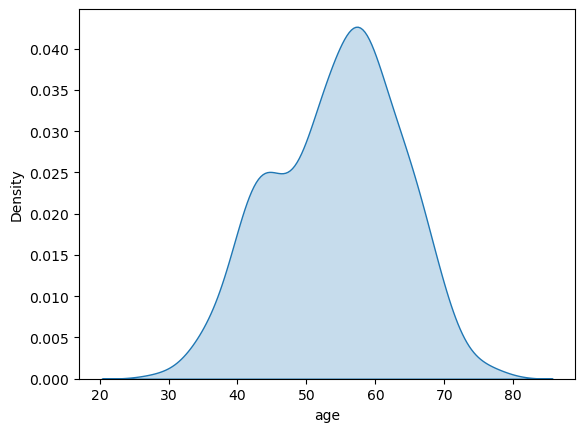

In [24]:
sns.kdeplot(data=Data['age'], shade=True)

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

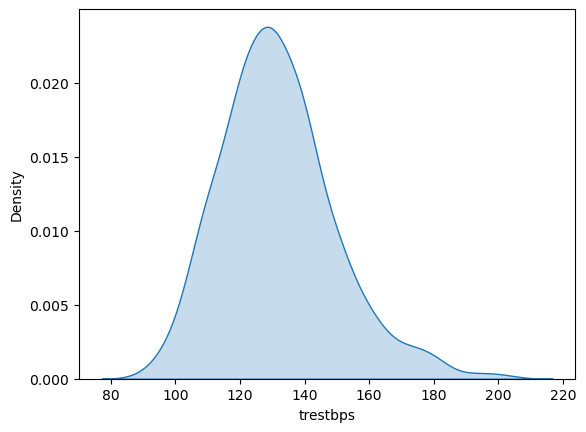

In [25]:
sns.kdeplot(data=Data['trestbps'], shade=True)

<AxesSubplot:xlabel='chol', ylabel='Density'>

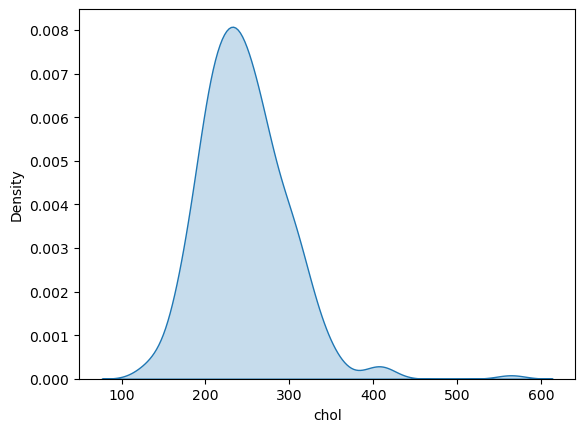

In [26]:
sns.kdeplot(data=Data['chol'], shade=True)

<AxesSubplot:xlabel='thalach', ylabel='Density'>

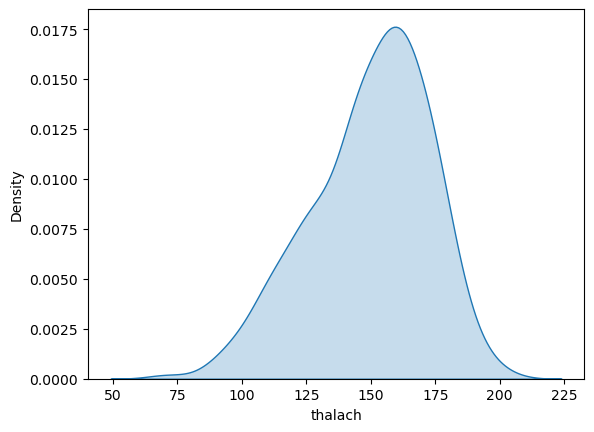

In [27]:
sns.kdeplot(data=Data['thalach'], shade=True)

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

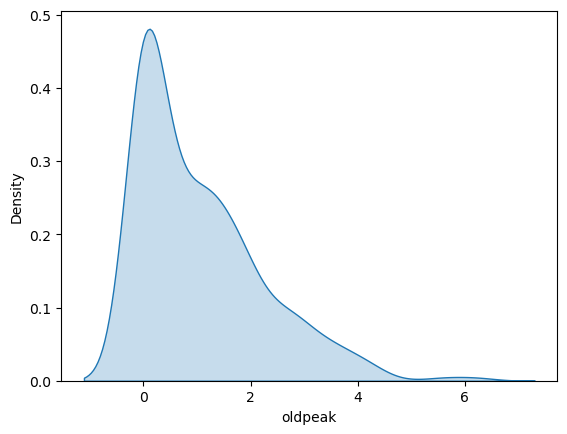

In [28]:
sns.kdeplot(data=Data['oldpeak'], shade=True)

<AxesSubplot:>

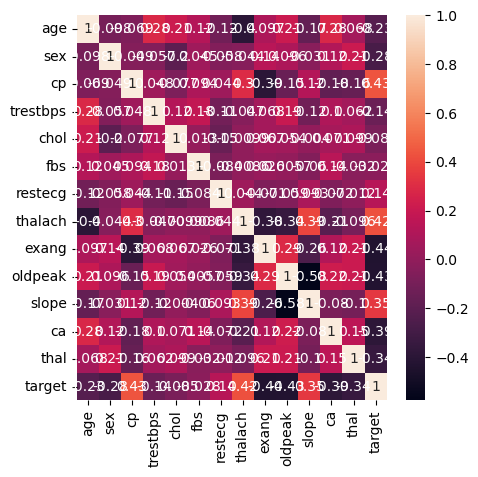

In [29]:
import seaborn as sns
corr = Data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

In [30]:
# !pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(Data, title="Report for our Project", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Implementation

In [31]:
Input = Data.drop('target',axis =1)
print(Input)
output = Data['target']
print(output)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size = 0.2, random_state=0)

# Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier()
model = model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(prediction)
Accuracy_Score = metrics.accuracy_score(prediction,y_test)
print("Accuracy Score of RandomForest Algorithm:",Accuracy_Score)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
Accuracy Score of RandomForest Algorithm: 0.8688524590163934


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[22,  5],
       [ 3, 31]], dtype=int64)

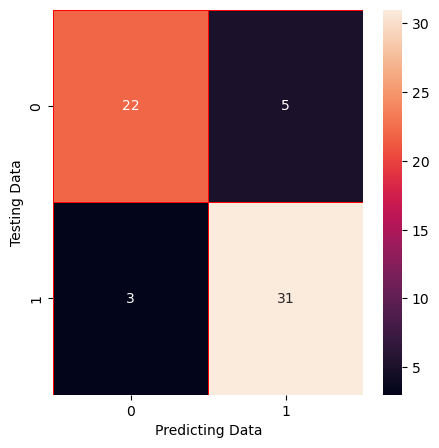

In [35]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicting Data")
plt.ylabel("Testing Data")
plt.show()

# Neural Network 

In [36]:
X = np.array(Data.drop(['target'], 1))
y = np.array(Data['target'])

C:\Users\DLK\AppData\Local\Temp\ipykernel_7996\443840707.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(Data.drop(['target'], 1))


In [37]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [38]:
# create X and Y datasets for training
from sklearn import model_selection

X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [39]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train1 = to_categorical(y_train1, num_classes=None)
Y_test1 = to_categorical(y_test1, num_classes=None)
print (Y_train1.shape)
print (Y_train1[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\DLK\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [46]:
# fit the model to the training data
history=model.fit(X_train1, Y_train1, validation_data=(X_test1, Y_test1),epochs=1, batch_size=10)

25/25 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8967 - val_loss: 0.4377 - val_accuracy: 0.7869


In [49]:
y_pred = model.predict(X_test1)

array([[0.9013673 , 0.09863269],
       [0.613846  , 0.38615397],
       [0.99411666, 0.00588328],
       [0.155039  , 0.844961  ],
       [0.49196687, 0.50803316],
       [0.97812825, 0.02187172],
       [0.25525326, 0.7447467 ],
       [0.9679356 , 0.03206445],
       [0.01063512, 0.98936486],
       [0.25805086, 0.7419492 ],
       [0.9382864 , 0.06171354],
       [0.29547736, 0.7045226 ],
       [0.98180425, 0.01819574],
       [0.02076476, 0.97923523],
       [0.00461921, 0.99538076],
       [0.07904077, 0.92095923],
       [0.06125991, 0.93874013],
       [0.10102858, 0.89897144],
       [0.27966842, 0.7203316 ],
       [0.11778844, 0.8822115 ],
       [0.32939625, 0.67060375],
       [0.8837206 , 0.11627937],
       [0.07716382, 0.92283624],
       [0.04717601, 0.952824  ],
       [0.05687924, 0.9431207 ],
       [0.9920723 , 0.00792778],
       [0.9208417 , 0.07915828],
       [0.31062055, 0.68937945],
       [0.8734589 , 0.12654105],
       [0.07493715, 0.9250629 ],
       [0.

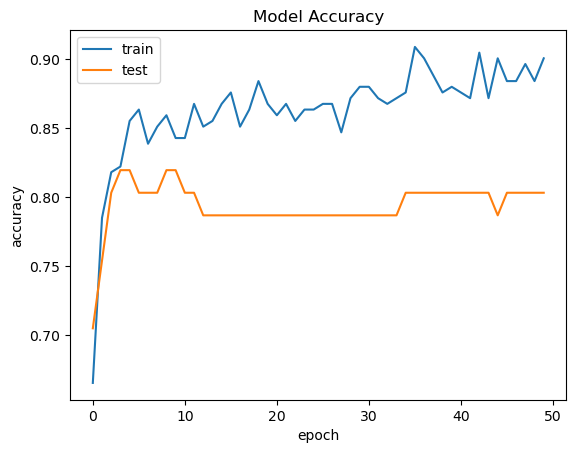

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

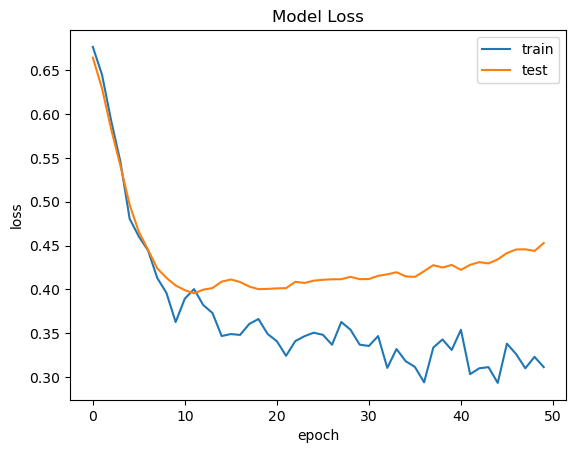

In [43]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Coding for GUI Data for using DL

In [52]:
def mod():
    def cardiac_disease(new_input):
        X = np.array(Data.drop(['target'], 1))
        y = np.array(Data['target'])
        mean = X.mean(axis=0)
        X -= mean
        std = X.std(axis=0)
        X /= std
# create X and Y datasets for training
        from sklearn import model_selection
        X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)
# convert the data to categorical labels
        from keras.utils.np_utils import to_categorical
        Y_train1 = to_categorical(y_train1, num_classes=None)
        Y_test1 = to_categorical(y_test1, num_classes=None)
        from keras.models import Sequential
        from keras.layers import Dense
        from tensorflow.keras.optimizers import Adam
        from keras.layers import Dropout
        from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())
# fit the model to the training data
history=model.fit(X_train1, Y_train1, validation_data=(X_test1, Y_test1),epochs=1, batch_size=10)
y_pred = model.predict(X_test1)
com=[y_pred]
    return com

window = Tk()
window.title("Cardiac Disease Prediction")
window.configure(background='black')
window.geometry('650x500')

lbl = Label(window, text="Enter the Patient details",fg="white", bg="black")
lbl.config(font=("Elephant", 14))
lbl.grid(column=2, row=0)

lbl = Label(window, text=" Age", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=1)
age = Entry(window,width=20)
age.grid(column=3, row=1,  pady=5)
age.focus()


lbl = Label(window, text=" Sex (m=1,f=0)",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=2)
sex = Entry(window,width=20)
sex.grid(column=3, row=2, pady=5)
sex.focus()


lbl = Label(window, text=" Chest pain level (0-3)", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=3)
cp = Entry(window,width=20)
cp.grid(column=3, row=3, pady=5)
cp.focus()


lbl = Label(window, text=" Resting blood pressure  (in mm Hg )", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=4)
bps = Entry(window,width=20)
bps.grid(column=3, row=4, pady=5)
bps.focus()

lbl = Label(window, text="Cholestoral in mg/dl", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=5)
chol = Entry(window,width=20)
chol.grid(column=3, row=5, pady=5)
chol.focus()

lbl = Label(window, text="(Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=6)
fbs = Entry(window,width=20)
fbs.grid(column=3, row=6, pady=5)
fbs.focus()

lbl = Label(window, text="Resting electrocardiographic results", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=7)
ecg = Entry(window,width=20)
ecg.grid(column=3, row=7, pady=5)
ecg.focus()

lbl = Label(window, text="Maximum heart rate achieved",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=8)
mhr = Entry(window,width=20)
mhr.grid(column=3, row=8, pady=5)
mhr.focus()

lbl = Label(window, text="Exercise induced angina (1 = yes; 0 = no)",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=9)
eia = Entry(window,width=20)
eia.grid(column=3, row=9, pady=5)
eia.focus()

lbl = Label(window, text="ST depression induced by exercise relative to rest",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=10)
st = Entry(window,width=20)
st.grid(column=3, row=10, pady=5)
st.focus()

lbl = Label(window, text="The slope of the peak exercise ST segment",fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=11)
slope = Entry(window,width=20)
slope.grid(column=3, row=11, pady=5)
slope.focus()

lbl = Label(window, text="Number of major vessels (0-3) colored by flourosopy", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=12)
ca = Entry(window,width=20)
ca.grid(column=3, row=12, pady=5)
ca.focus()

lbl = Label(window, text=" A blood disorder called thalassemia \n (3 = normal; 6 = fixed defect; 7 = reversable defect)", fg="yellow", bg="black")
lbl.config(font=("Times New Roman", 12))
lbl.grid(column=1, row=13)
thal = Entry(window,width=20)
thal.grid(column=3, row=13, pady=5)
thal.focus()

    def clicked():
        new_input=[age.get(),sex.get(),cp.get(),bps.get(),chol.get(),fbs.get(),ecg.get(),mhr.get(),eia.get(),st.get(),slope.get(),ca.get(),thal.get()]
    #     listToStr = ' ,'.join(map(str, new_input)) 
    #     inp.configure(text= "you entered: "+listToStr )
        new_input= np.reshape(new_input,(1,-1))
        d=cardiac_disease(new_input)
        ans=d[0]
#         score=cross_val_score(randomforest_classifier,x,y,cv=15)
        sc=str(d[1]*100)

        if(ans==1):
            s='you have a Cardiac Disease'
        else:
            s="you are in Good health"
        ot.configure(text="Result: " + s + "\n(accuracy ="+ sc +"% )" )



    btn = Button(window, text="submit",fg="red", command=clicked)
    btn.grid(column=3, row=15)


    ot = Label(window, text="",font=("Times New Roman", 14))
    ot.grid(column=1, row=17)


    window.mainloop()
mod() 

IndentationError: unexpected indent (2168546925.py, line 46)